<a href="https://colab.research.google.com/github/mzaman202006/Telco_churn_prediction/blob/main/code_deep_learning_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras

# Importing dataset 

In [ ]:
df=pd.read_csv("Telco_Customer_Churn_Data.csv")
df.head()
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(how="any",inplace=True)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') #converting TotalCharges data type 

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(how="any",inplace=True) #dropping null value 

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# LabelEncoder apply to convert category data to numreic data




In [ ]:
encoder = LabelEncoder()
df['Churn'] = encoder.fit_transform(df['Churn'])


In [ ]:
df['PaymentMethod'] = encoder.fit_transform(df['PaymentMethod'])
print({index : label for index, label in enumerate(encoder.classes_)})

{0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}


In [ ]:
df['customerID'] = encoder.fit_transform(df['customerID'])
df['gender'] = encoder.fit_transform(df['gender'])
df['Partner'] = encoder.fit_transform(df['Partner'])
df['Dependents'] = encoder.fit_transform(df['Dependents'])
df['PhoneService'] = encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = encoder.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = encoder.fit_transform(df['PaperlessBilling'])

In [ ]:
y = df['Churn'].values
X = df.drop(columns = ['Churn'])

In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1)) #normalize
X = scaler.fit_transform(X)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])


x 
 [[0.76304935 0.         0.         1.         0.         0.
  0.         0.5        0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.66666667
  0.11542289 0.0012751 ]
 [0.56222443 1.         0.         0.         0.         0.46478873
  1.         0.         0.         1.         1.         1.
  0.         0.         0.         0.5        0.         1.
  0.38507463 0.21586661]
 [0.36381738 1.         0.         0.         0.         0.01408451
  1.         0.         0.         1.         1.         0.
  0.         0.         0.         0.         1.         1.
  0.35422886 0.01031041]
 [0.78566349 1.         0.         0.         0.         0.61971831
  0.         0.5        0.         1.         1.         1.
  1.         0.         0.         0.5        0.         0.
  0.23930348 0.21024117]
 [0.92447731 0.         0.         0.         0.         0.01408451
  1.         0.         0.5        0.         0.         0.
  0.         0. 

# Test and train dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

# LogisticRegression

In [ ]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('Classes are : ' , LogisticRegressionModel.classes_)
print('No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
#y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
#print('Predicted Value : ' , y_pred[:10])
#print('Prediction Probabilities Value : ' , y_pred_prob[:10])

Train Score is :  0.8056269637246501
Test Score is :  0.8333333333333334
Classes are :  [0 1]
No. of iteratios is :  [28]


 **Model accuracy**

In [ ]:
prediction_test = LogisticRegressionModel.predict(X_test)
# Prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8333333333333334


In [ ]:
#Confusion_matrix
y_pred = LogisticRegressionModel.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print ("Tp" + str(tp))
print ("tn" +str(tn))
print ("fp" +str(fp))
print ("fn" +str(fn))
#CM_display = ConfusionMatrixDisplay(CM).plot()

Tp5
tn20
fp1
fn4


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.83      0.56      0.67         9

    accuracy                           0.83        30
   macro avg       0.83      0.75      0.78        30
weighted avg       0.83      0.83      0.82        30



# RandomForestClassifier

0.8127962085308057
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1580
           1       0.68      0.49      0.57       530

    accuracy                           0.81      2110
   macro avg       0.76      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110



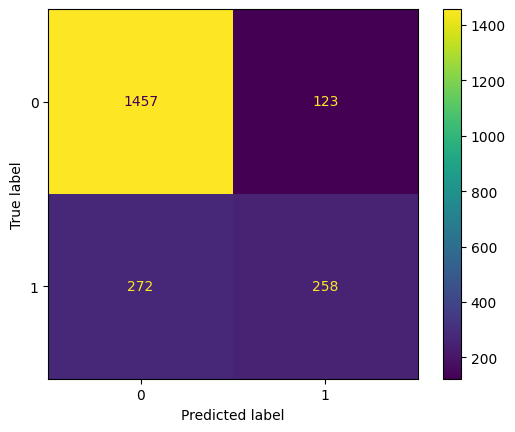

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
CM_display = ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_test, y_pred))


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print ("Tp" + str(tp))
print ("tn" +str(tn))
print ("fp" +str(fp))
print ("fn" +str(fn))

Tp258
tn1457
fp123
fn272


# SVC

0.8095238095238095
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1042
           1       0.66      0.54      0.59       365

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



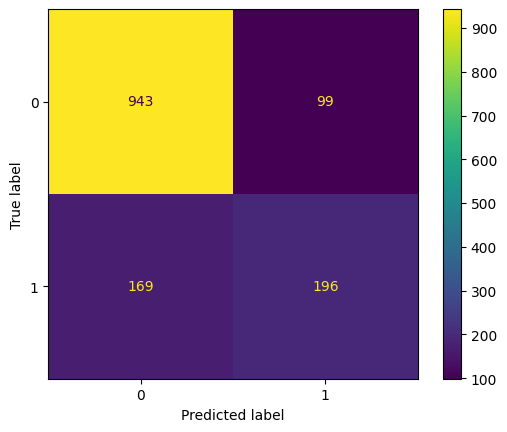

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
svm = SVC(kernel='linear') 
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
print (metrics.accuracy_score(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
CM_display = ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_test, y_pred))


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print ("Tp" + str(tp))
print ("tn" +str(tn))
print ("fp" +str(fp))
print ("fn" +str(fn))

Tp196
tn943
fp99
fn169


# AdaBoostClassifier

0.8180525941719972
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.69      0.54      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



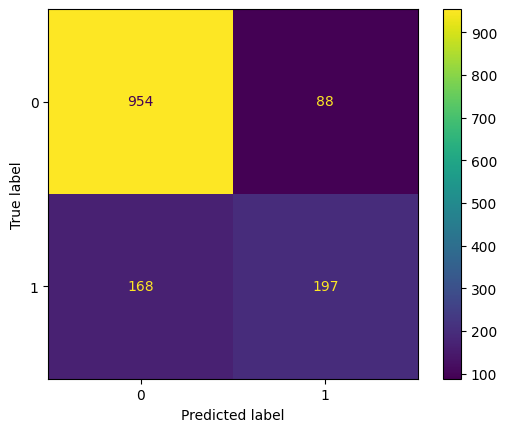

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

#y_pred = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
CM_display = ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_test, y_pred))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print ("Tp" + str(tp))
print ("tn" +str(tn))
print ("fp" +str(fp))
print ("fn" +str(fn))

Tp197
tn954
fp88
fn168


#XGBClassifier

0.8052594171997157
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1042
           1       0.65      0.53      0.59       365

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



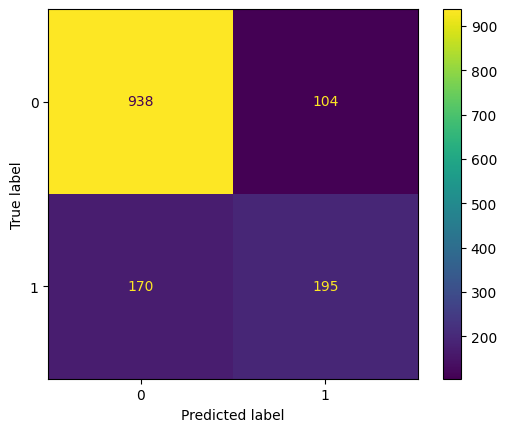

In [ ]:

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
CM_display = ConfusionMatrixDisplay(CM).plot()
print(classification_report(y_test, y_pred))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print ("Tp" + str(tp))
print ("tn" +str(tn))
print ("fp" +str(fp))
print ("fn" +str(fn))

Tp195
tn938
fp104
fn170


# ANN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 2s 2ms/step - loss: 0.5286 - accuracy: 0.7349
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7812
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7902
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7947
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.7970
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7984
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7988
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.7979
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8016
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8007

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8124


[0.4094662666320801, 0.8123667240142822]

In [ ]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.36107644],
       [0.6815068 ],
       [0.03014463],
       [0.01038654],
       [0.5260457 ]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1]

In [ ]:
y_test[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1042
           1       0.66      0.57      0.61       365

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407

0.8123667377398721


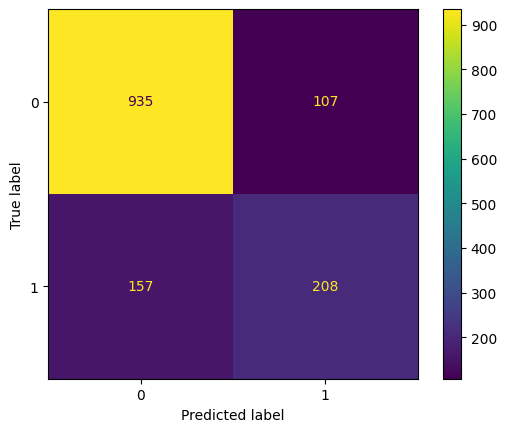

In [ ]:
print(classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))
CM = confusion_matrix(y_test, y_pred)
CM_display = ConfusionMatrixDisplay(CM).plot()
#print(classification_report(y_test, y_pred))